In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**DataFrame Creation**

In [22]:
products_df = pd.read_csv('./instacart_2017_05_01/products.csv')
aisles_df = pd.read_csv('./instacart_2017_05_01/aisles.csv')
departments_df = pd.read_csv('./instacart_2017_05_01/departments.csv')

In [23]:
orders_df = pd.read_csv('./instacart_2017_05_01/orders.csv')
order_products_prior_df = pd.read_csv('./instacart_2017_05_01/order_products__prior.csv')
order_products_train_df = pd.read_csv('./instacart_2017_05_01/order_products__train.csv')

**Let's join the product's table with department and aisle table**

In [24]:
products_df = pd.merge(products_df, aisles_df, on='aisle_id', how='left')
products_df = pd.merge(products_df, departments_df, on='department_id', how='left')

In [28]:
products_df.drop(['aisle_id', 'department_id'], inplace = True, axis=1)

In [29]:
products_df.head()

,product_id,product_name,aisle,department
0,1,Chocolate Sandwich Cookies,cookies cakes,snacks
1,2,All-Seasons Salt,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,frozen meals,frozen
4,5,Green Chile Anytime Sauce,marinades meat preparation,pantry


In [34]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on ='product_id', how='left')
order_products_train_df = pd.merge(order_products_train_df, products_df, on='product_id', how='left')

In [42]:
order_prior_df = pd.merge(order_products_prior_df, orders_df, on='order_id', how='left')
order_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')

**Pickle**

In [48]:
# order_prior_df.to_pickle('order_prior_df.pkl')
# order_train_df.to_pickle('order_train_df.pkl')

In [2]:
order_prior_df = pd.read_pickle('order_prior_df.pkl')
order_train_df = pd.read_pickle('order_train_df.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'order_prior_df.pkl'

In [ ]:
order_prior_df.head()

**Exploratory Data Analysis**

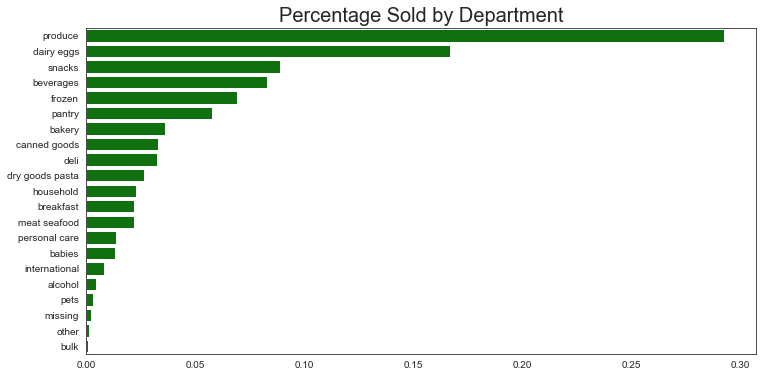

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(y = order_prior_df.department.value_counts(normalize=True).index, 
            x = order_prior_df.department.value_counts(normalize=True).values, color = 'green')
plt.title('Percentage Sold by Department', size = 20)
plt.savefig('./EDA/Sold by Deparment.png')

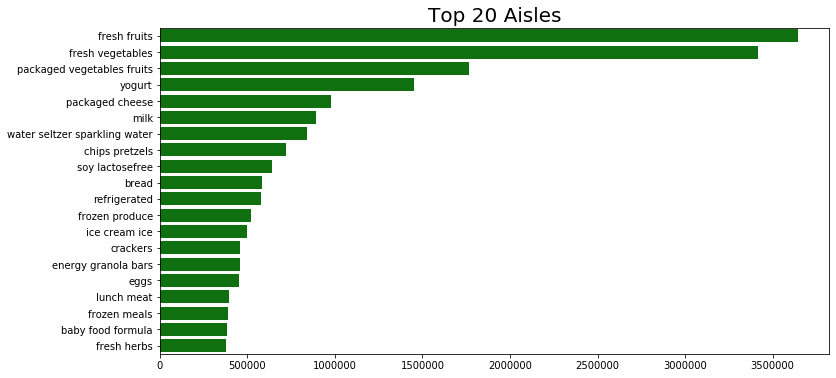

In [8]:
plt.figure(figsize = (12,6))
sns.barplot(y = order_prior_df.aisle.value_counts()[:20].index, 
            x = order_prior_df.aisle.value_counts()[:20].values, color = 'green')
plt.title('Top 20 Aisles', size = 20)
plt.savefig('./EDA/Sold by Aisles.png')

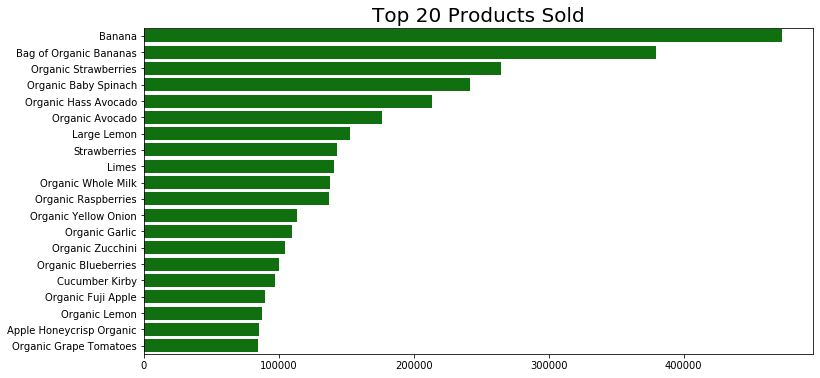

In [9]:
plt.figure(figsize = (12,6))
sns.barplot(y = order_prior_df.product_name.value_counts()[:20].index, 
            x = order_prior_df.product_name.value_counts()[:20].values, color = 'green')
plt.title('Top 20 Products Sold', size = 20)
plt.savefig('./EDA/Top 20 PRoducts Sold.png')

In [10]:
day_time_order_df = order_prior_df.groupby('order_id')['order_hour_of_day', 'order_dow'].mean()

In [11]:
total_product_order_hod = order_prior_df.groupby('order_hour_of_day')['order_id'].count()

In [12]:
order_per_hour = []
for n in range(24):
    unique_order = order_prior_df[order_prior_df['order_hour_of_day'] == n]['order_id'].nunique()
    order_per_hour.append(unique_order)
order_per_hour = pd.Series(order_per_hour)

In [13]:
average_product_sold_per_hod = total_product_order_hod / order_per_hour

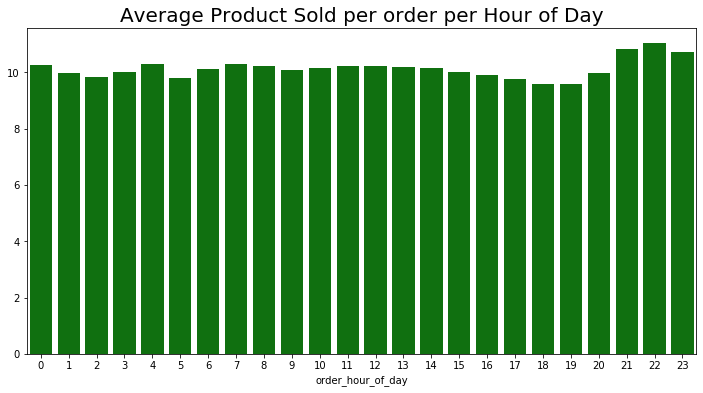

In [15]:
plt.figure(figsize = (12,6))
sns.barplot(x = average_product_sold_per_hod.index,
            y = average_product_sold_per_hod.values, color = 'green')
plt.title('Average Product Sold per order per Hour of Day', size = 20)
plt.savefig('./EDA/Average Product Sold per order per Hour of Day.png')

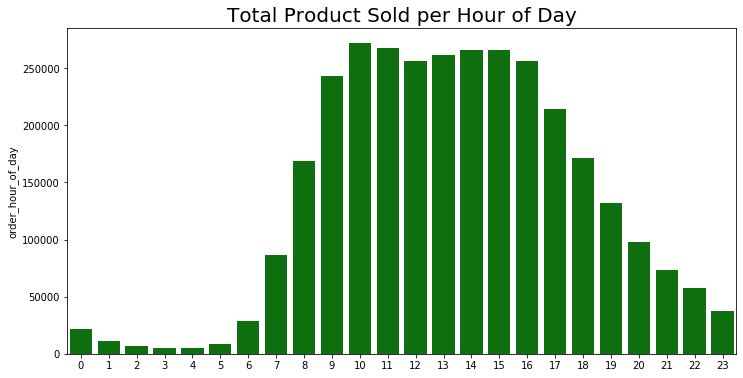

In [16]:
plt.figure(figsize = (12,6))
sns.barplot(x = day_time_order_df['order_hour_of_day'].value_counts().index,
            y = day_time_order_df['order_hour_of_day'].value_counts(), color = 'green')
plt.title('Total Product Sold per Hour of Day', size = 20)
plt.savefig('./EDA/Total Product Sold per Hour of Day.png')

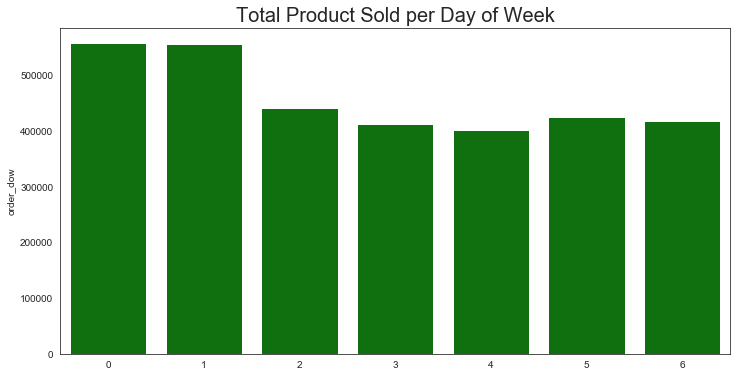

In [23]:
plt.figure(figsize = (12,6))
sns.barplot(x = day_time_order_df['order_dow'].value_counts().index,
            y = day_time_order_df['order_dow'].value_counts(), color = 'green')
plt.title('Total Product Sold per Day of Week', size = 20)
plt.savefig('./EDA/Product Sold per Week.png')

In [24]:
day_time_df = order_prior_df.groupby(['order_dow','order_hour_of_day'])['product_name'].count()

In [25]:
dow0 = day_time_df[:24].values
dow1 = day_time_df[24:48].values
dow2 = day_time_df[48:72].values
dow3 = day_time_df[72:96].values
dow4 = day_time_df[96:120].values
dow5 = day_time_df[120:144].values
dow6 = day_time_df[144:168].values

In [26]:
day_time_df_hm = pd.DataFrame(columns = np.arange(0,24), 
                              index = np.arange(0,7), 
                              data = [dow0, dow1, dow2, dow3, dow4, dow5, dow6])

In [27]:
day_mapper = {0:'Sunday', 1:'Saturday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}
day_time_df_hm.rename(index = day_mapper, inplace = True)

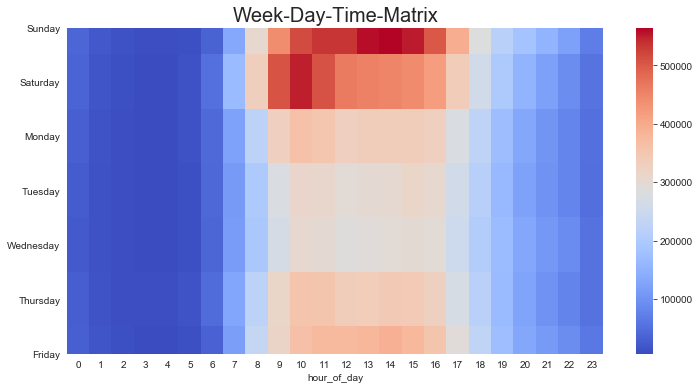

In [33]:
plt.figure(figsize = (12,6))
sns.heatmap(day_time_df_hm, cmap="coolwarm")
plt.xlabel('hour_of_day')
plt.yticks(rotation='horizontal')
plt.title('Week-Day-Time-Matrix', size = 20)
plt.savefig('./EDA/Week-day-time-matrix.png')

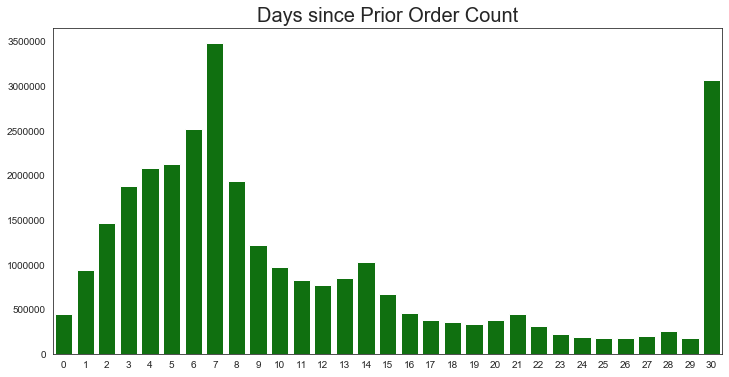

In [34]:
plt.figure(figsize = (12,6))
sns.barplot(x = order_prior_df.days_since_prior_order.value_counts().index.astype(int), 
            y = order_prior_df.days_since_prior_order.value_counts().values, color = 'green')
plt.title('Days since Prior Order Count', size = 20)
plt.savefig('./EDA/Days_since_prior_order.png')

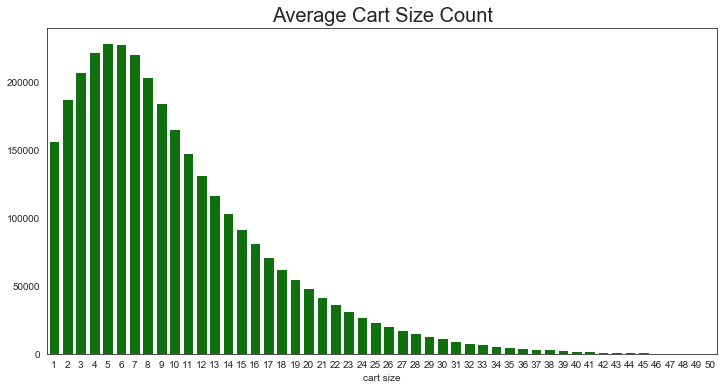

In [35]:
cart_size = order_prior_df.groupby('order_id')['add_to_cart_order'].max().value_counts()
plt.figure(figsize = (12,6))
sns.barplot(x = cart_size[:50].index, y = cart_size[:50].values, color = 'green')
plt.xlabel('cart size')
plt.title('Average Cart Size Count', size = 20)
plt.savefig('./EDA/Average Cart Size Count.png')

**Calculate the reorder frequency per order_id**

In [36]:
reorder_temp = order_prior_df.groupby('order_id')['add_to_cart_order', 'reordered'].agg(['max','sum'])

In [37]:
reorder_temp['freq'] = reorder_temp['reordered']['sum']/reorder_temp['add_to_cart_order']['max']

In [38]:
cart_size_reorder_freq_mean = reorder_temp.groupby(reorder_temp['add_to_cart_order']['max'])['freq'].mean()

Text(0, 0.5, 'average reordered frequency')

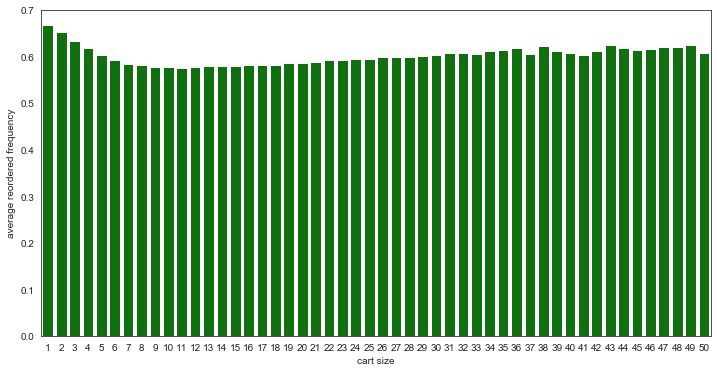

In [39]:
plt.figure(figsize = (12,6))
sns.barplot(x = cart_size_reorder_freq_mean[:50].index, 
            y = cart_size_reorder_freq_mean[:50].values, color = 'green')
plt.xlabel('cart size')
plt.ylabel('average reordered frequency')

**Calculate the reorder frequency per product_name**

In [40]:
total_product_order = order_prior_df.product_name.value_counts()
total_reorder_per_product = order_prior_df.groupby('product_name')['reordered'].sum()
reorder_freq = total_reorder_per_product/total_product_order[:500]
reorder_freq = reorder_freq.sort_values(ascending=False)

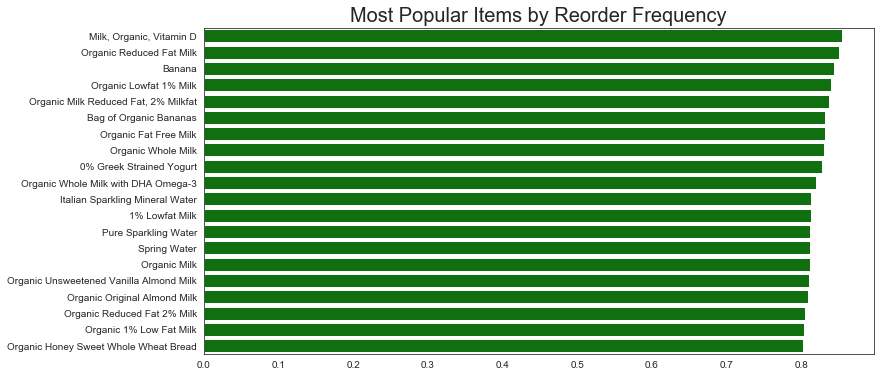

In [42]:
plt.figure(figsize = (12,6))
sns.barplot(y = reorder_freq[:20].index, 
            x = reorder_freq[:20].values, color = 'green')
plt.title('Most Popular Items by Reorder Frequency', size = 20)
plt.savefig('./EDA/popular_items_by_reorder_Frequency.png')

**Which product is added first to cart the most frequently?**

1. products which are bought often will higher chance of being added first
2. we can normalize this by looking at the rate (added to cart / total number of product)

In [43]:
product_counts = order_prior_df.product_name.value_counts()

In [44]:
first_to_cart = (order_prior_df[order_prior_df['add_to_cart_order']==1].
                 groupby('product_name')['add_to_cart_order', 'reordered'].sum())

In [45]:
first_to_cart_freq = first_to_cart['add_to_cart_order']/product_counts[:1000]
first_to_cart_freq_500 = first_to_cart_freq[first_to_cart_freq.notna()].sort_values(ascending = False)

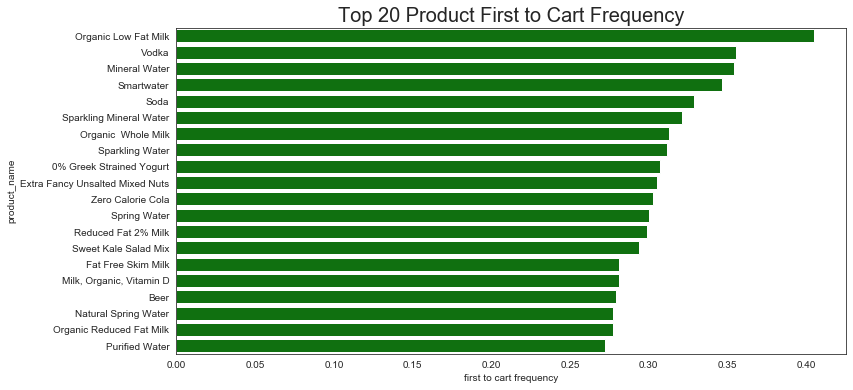

In [50]:
plt.figure(figsize = (12,6))
sns.barplot(y = first_to_cart_freq_500[:20].index, 
            x = first_to_cart_freq_500[:20].values, color = 'green')
plt.xlabel('first to cart frequency')
plt.ylabel('product_name')
plt.title('Top 20 Product First to Cart Frequency', size = 20)
plt.savefig('./EDA/First to Cart Frequency.png')
# of all organic low fat milk bought, about 40% of it were added to cart first

**How do the reorder frequency change throughout the week?**

In [51]:
total_order_per_day = order_prior_df.groupby('order_dow')['product_name'].count()
total_reordered_per_day = order_prior_df.groupby('order_dow')['reordered'].sum()
reordered_freq_per_day = total_reordered_per_day/total_order_per_day

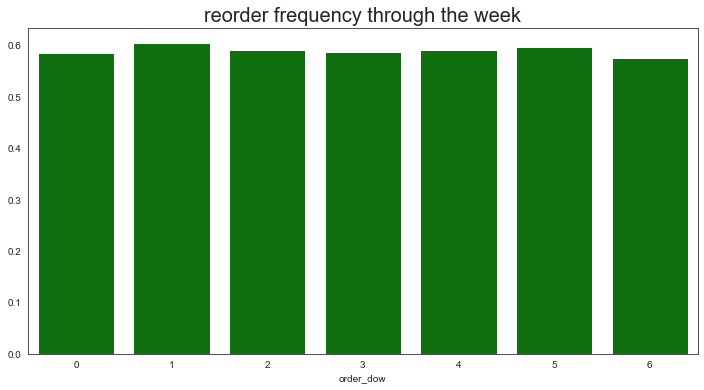

In [53]:
plt.figure(figsize = (12,6))
sns.barplot(x = reordered_freq_per_day.index, y = reordered_freq_per_day.values, color = 'green')
plt.title('reorder frequency through the week', size = 20)
plt.savefig('./EDA/Reorder_Frequency thru the week.png')

In [54]:
reordered_num = order_prior_df.groupby('product_name')['reordered'].sum()
num_of_product_bought_once = reordered_num[reordered_num==0].count()
num_of_product_bought_once
num_unique_prod = order_prior_df['product_name'].nunique()


print(f'There are {num_of_product_bought_once} products which were only bought once')
print(f'This is {round(num_of_product_bought_once/num_unique_prod,3)} of all unique products sold') 

There are 4372 products which were only bought once
This is 0.088 of all unique products sold


In [55]:
order_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,baking ingredients,pantry,202279,prior,3,5,9,8.0
